In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv("malicious_phish.csv")

In [2]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
df.shape

(651191, 2)

<Axes: >

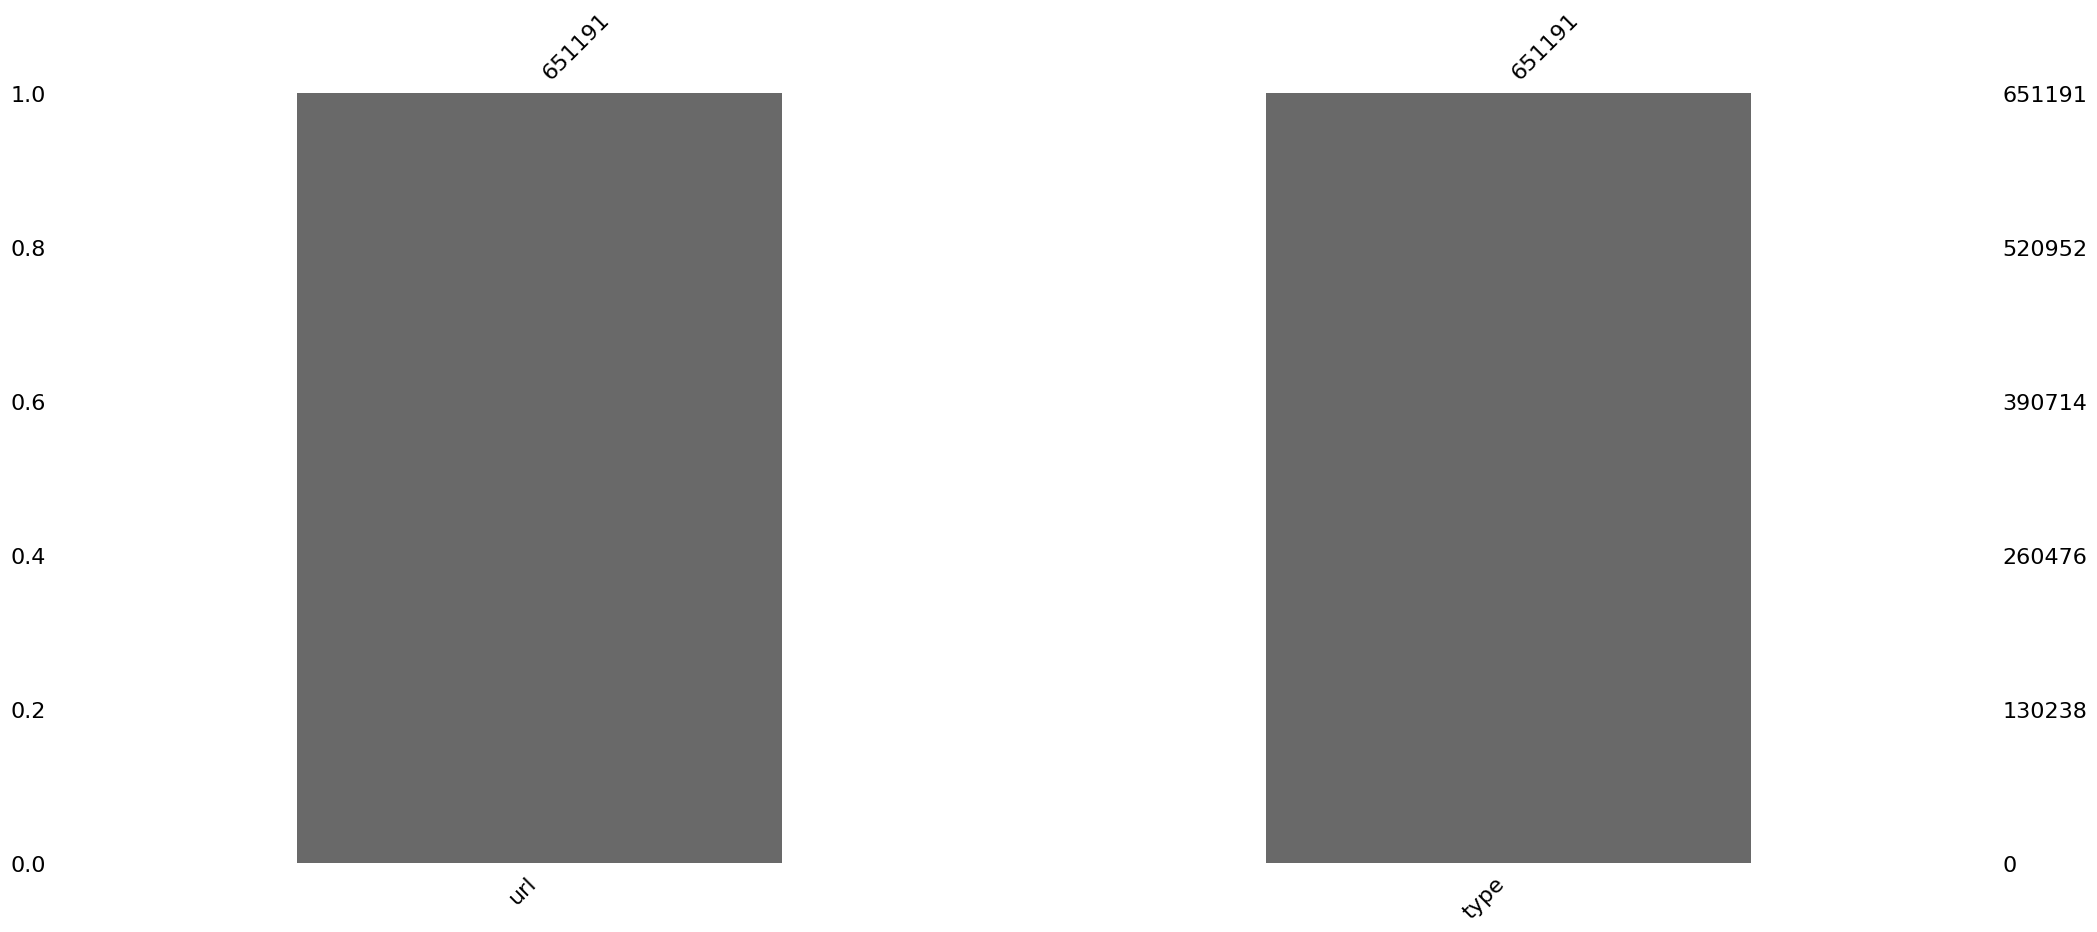

In [4]:
import missingno
missingno.bar(df)

In [5]:
df.shape

(651191, 2)

# EDA

<Axes: ylabel='type'>

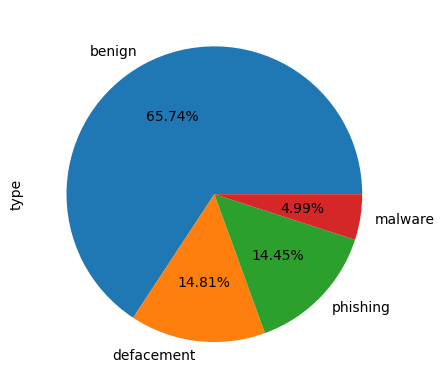

In [6]:
df.type.value_counts().plot(kind='pie', autopct='%.2f%%')

# Feature Engineering

In [29]:
import re

def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)
    if match:
        return 1
    else:
        return 0

In [30]:
df['is_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [31]:
df[df['is_ip'] == 1].head()

,url,type,is_ip
10408,http://219.232.244.89/intl/update/error_login.htm,phishing,1
12441,boards.ancestry.com/topics.ethnic.natam.nation...,benign,1
12853,http://www.controlyourbreath.com/new/css_/img/...,phishing,1
13161,http://www.reqntpvw.com/Public/softs/everythin...,malware,1
14915,http://66.208.115.70/images/index.asp,phishing,1


In [32]:
len(df[df['is_ip'] == 1])

7293

In [33]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0

In [34]:
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [35]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net', url)
    if match:
        return 1
    else:
        return 0

In [36]:
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [37]:
df.head()

,url,type,is_ip,abnormal_url,short_url
0,br-icloud.com.br,phishing,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,0


In [38]:
def urllen(url):
    return len(url)

In [39]:
df['url_len'] = df['url'].apply(lambda i: urllen(i))

In [40]:
df.head()

,url,type,is_ip,abnormal_url,short_url,url_len
0,br-icloud.com.br,phishing,0,0,0,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,0,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,0,235


In [41]:
def dotcount(url):
    return url.count('.')

In [42]:
df['count_dot'] = df['url'].apply(lambda i: dotcount(i))

In [43]:
df.head()

,url,type,is_ip,abnormal_url,short_url,url_len,count_dot
0,br-icloud.com.br,phishing,0,0,0,16,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,35,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,31,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,0,88,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,0,235,2


In [44]:
def delimitercount(url):
    return url.count(';') + url.count('_') + url.count('?') + url.count('=') + url.count('&')

In [45]:
df['count_delim'] = df['url'].apply(lambda i: delimitercount(i))

In [46]:
df.head()

,url,type,is_ip,abnormal_url,short_url,url_len,count_dot,count_delim
0,br-icloud.com.br,phishing,0,0,0,16,2,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,35,2,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,31,2,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,0,88,3,10
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,0,235,2,7


In [47]:
def hypencount(url):
    return url.count('-')

In [48]:
df['count_hypen'] = df['url'].apply(lambda i: hypencount(i))

In [49]:
df.head()

,url,type,is_ip,abnormal_url,short_url,url_len,count_dot,count_delim,count_hypen
0,br-icloud.com.br,phishing,0,0,0,16,2,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,35,2,1,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,31,2,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,0,88,3,10,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,0,235,2,7,1


In [50]:
def atcount(url):
    return url.count('@')

In [51]:
df['count_at'] = df['url'].apply(lambda i: atcount(i))

In [52]:
df.head()

,url,type,is_ip,abnormal_url,short_url,url_len,count_dot,count_delim,count_hypen,count_at
0,br-icloud.com.br,phishing,0,0,0,16,2,0,1,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,35,2,1,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,31,2,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,0,88,3,10,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,0,235,2,7,1,0


In [53]:
def subdircount(url):
    return url.count('/')

In [54]:
df['count_subdir'] = df['url'].apply(lambda i: subdircount(i))

In [55]:
df.head()

,url,type,is_ip,abnormal_url,short_url,url_len,count_dot,count_delim,count_hypen,count_at,count_subdir
0,br-icloud.com.br,phishing,0,0,0,16,2,0,1,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,35,2,1,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,31,2,0,0,0,3
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,0,88,3,10,1,0,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,0,235,2,7,1,0,3


In [56]:
def subdomaincount(subdomain):
    if subdomain:
        return len(subdomain.split('.'))
    else:
        return 0

In [57]:
df['count_subdomain'] = df['url'].apply(lambda i: subdomaincount(i))

In [58]:
df.head()

,url,type,is_ip,abnormal_url,short_url,url_len,count_dot,count_delim,count_hypen,count_at,count_subdir,count_subdomain
0,br-icloud.com.br,phishing,0,0,0,16,2,0,1,0,0,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,35,2,1,0,0,2,3
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,31,2,0,0,0,3,3
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,0,88,3,10,1,0,3,4
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,0,235,2,7,1,0,3,3


In [59]:
def querycount(query):
    if query:
        return len(query.split('&'))
    else:
        return 0

In [60]:
df['count_query'] = df['url'].apply(lambda i: querycount(i))

In [61]:
df.head()

,url,type,is_ip,abnormal_url,short_url,url_len,count_dot,count_delim,count_hypen,count_at,count_subdir,count_subdomain,count_query
0,br-icloud.com.br,phishing,0,0,0,16,2,0,1,0,0,3,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,35,2,1,0,0,2,3,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,31,2,0,0,0,3,3,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,0,88,3,10,1,0,3,4,4
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,0,235,2,7,1,0,3,3,3


In [67]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [68]:
df['type'] = label_encoder(df['type'])

type ['benign' 'defacement' 'malware' 'phishing']


# Train Test Split

In [78]:
from sklearn.model_selection import train_test_split

X = df.drop(['url', 'type'], axis=1)
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4242)

# Model

In [74]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import joblib
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
def plot_confusion_matrix(y_test, y_pred, model):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.title(f'{model} Confusion Matrix')
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Pastel1')
    plt.show()

# Adaboost

In [79]:
ada_model = AdaBoostClassifier().fit(X_train, y_train)

In [80]:
y_pred = ada_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5567829318481966

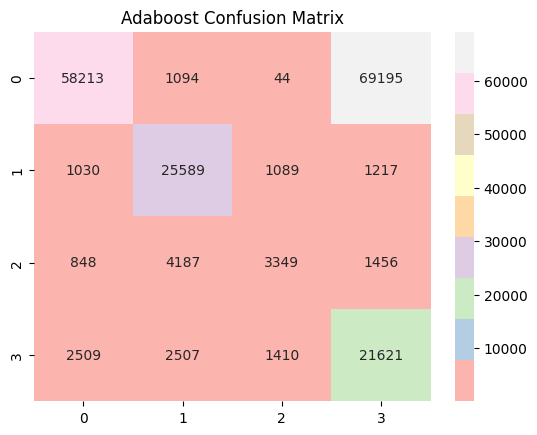

In [83]:
plot_confusion_matrix(y_test, y_pred, "Adaboost")

# DecisionTree

In [84]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [85]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9116391445448868

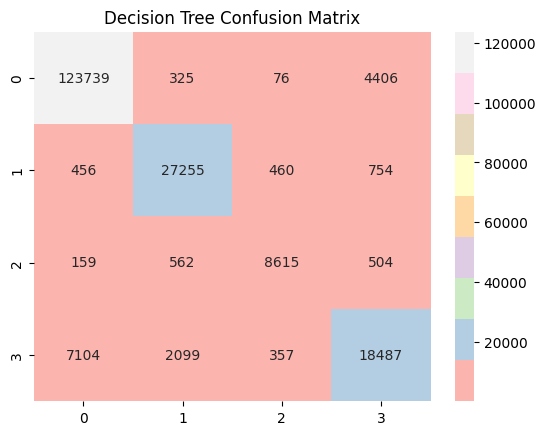

In [86]:
plot_confusion_matrix(y_test, y_pred, "Decision Tree")

# Random Forest

In [87]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [88]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9143572313393872

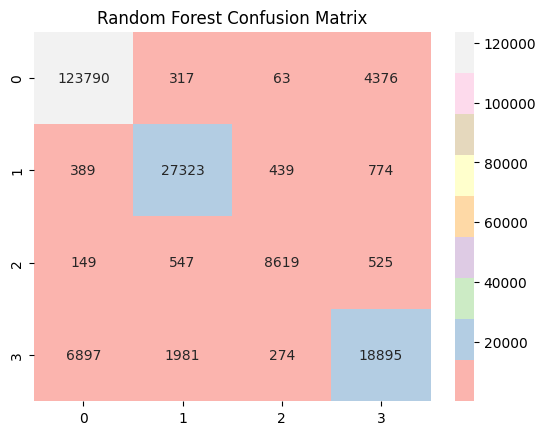

In [89]:
plot_confusion_matrix(y_test, y_pred, "Random Forest")

# Logistic Regression

In [90]:
logistic_model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [91]:
y_pred = logistic_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.792877691213055

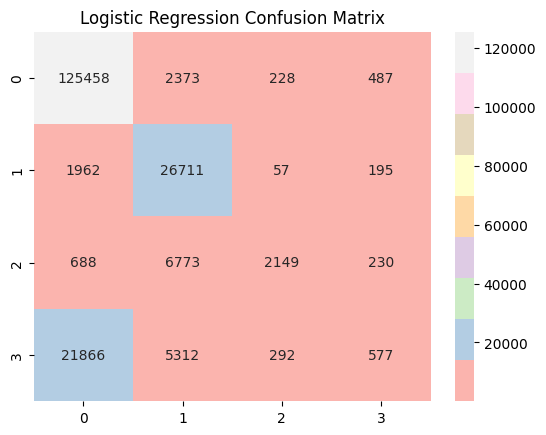

In [92]:
plot_confusion_matrix(y_test, y_pred, "Logistic Regression")

# XGBoost

In [93]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [94]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9095967403433696

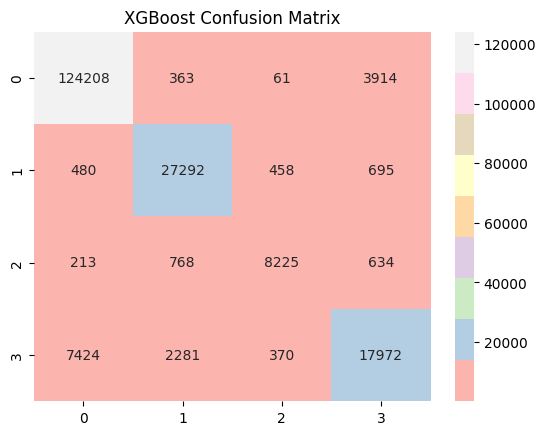

In [95]:
plot_confusion_matrix(y_test, y_pred, "XGBoost")

# Gradient Boosting

In [96]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [97]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8827793077324706

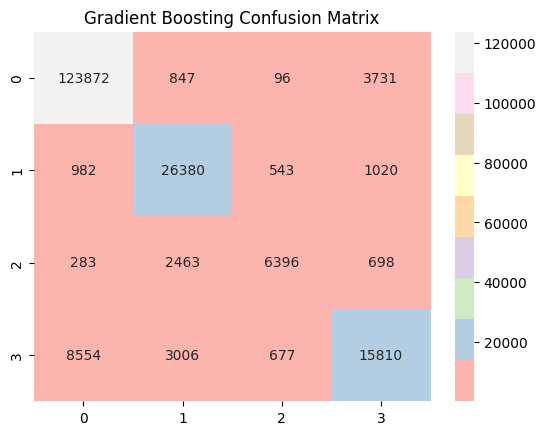

In [98]:
plot_confusion_matrix(y_test, y_pred, "Gradient Boosting")

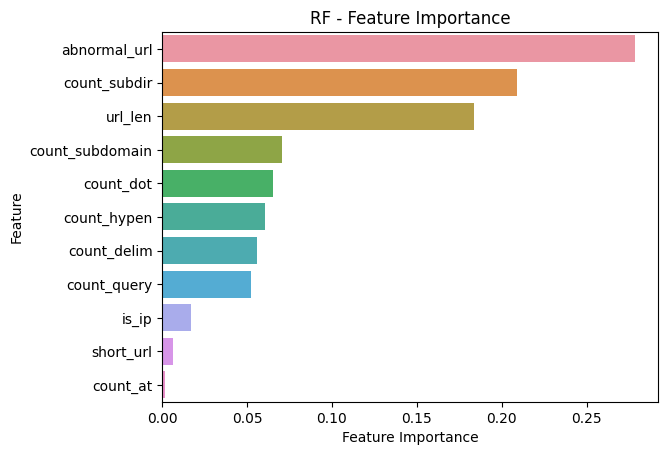

In [104]:
features = pd.DataFrame({'Feature': X_train.columns, 'Feature Importance': rf_model.feature_importances_})
plt.figure()
plt.title('RF - Feature Importance')
sns.barplot(data=features.sort_values(by='Feature Importance', ascending=False), x='Feature Importance', y='Feature', orient='h')
plt.show()

In [105]:
import pickle

pickle.dump(rf_model, open('rf_model.pkl', 'wb'))

# Test

In [118]:
output = pd.DataFrame(columns=df.columns)
output.loc[0, 'url'] = 'http://www.garage-pirenne.be/index.php?option=..'

In [119]:
output.head()

,url,type,is_ip,abnormal_url,short_url,url_len,count_dot,count_delim,count_hypen,count_at,count_subdir,count_subdomain,count_query
0,http://www.garage-pirenne.be/index.php?option=..,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
output['is_ip'] = output['url'].apply(lambda i: having_ip_address(i))
output['abnormal_url'] = output['url'].apply(lambda i: abnormal_url(i))
output['short_url'] = output['url'].apply(lambda i: shortening_service(i))
output['url_len'] = output['url'].apply(lambda i: urllen(i))
output['count_dot'] = output['url'].apply(lambda i: dotcount(i))
output['count_delim'] = output['url'].apply(lambda i: delimitercount(i))
output['count_hypen'] = output['url'].apply(lambda i: hypencount(i))
output['count_at'] = output['url'].apply(lambda i: atcount(i))
output['count_subdir'] = output['url'].apply(lambda i: subdircount(i))
output['count_subdomain'] = output['url'].apply(lambda i: subdomaincount(i))
output['count_query'] = output['url'].apply(lambda i: querycount(i))

In [121]:
output.head()

,url,type,is_ip,abnormal_url,short_url,url_len,count_dot,count_delim,count_hypen,count_at,count_subdir,count_subdomain,count_query
0,http://www.garage-pirenne.be/index.php?option=..,NaN,0,1,0,48,5,2,1,0,3,6,1


In [122]:
output.drop(columns=['url', 'type'], axis=1, inplace=True)

In [123]:
# benign = 0
# defacement = 1
# malware = 2
# phishing = 3
result = rf_model.predict(output)
result.item()

3